> ### Perceptron from scratch (_version 0.1_)
> Creating a simple discrete perceptron classifier from scratch

In [156]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Creating the perceptron classifier

In [157]:
# Returns the score of a particular set of features given the perceptron's weights and bias
def score(weights:list, features:list, bias:float) -> float: 
    return np.dot(weights, features) + bias

# Returns a binary evaluation of any float
def step(x:float) -> int: 
    return 1 if x>=0 else 0

# Returns the prediction of the perceptron by applying the step function to the score
def prediction(weights:list, features:list, bias:float) -> int:
    return step(score(weights, features, bias))

# Return the error of a perceptron given a data point's true label and features
def error(weights:list, features:list, bias:float, label:int) -> float:
    pred = prediction(weights, features, bias)
    if pred == label:
        return 0
    return np.abs(score(weights, features, bias))

# Returns the mean absolute error (MAE) of the perceptron over the entire dataset
def mean_error(weights:list, bias:float, all_features:list[tuple], all_labels:list[int]) -> float:
    total_error = 0
    for i in range(len(all_features)):
        total_error += error(weights, all_features[i], bias, all_labels[i])
    return total_error/len(all_features)

# Adjust the perceptron's weight and bias given a data point's true label and features
def adjust_perceptron(weights:list, features:list, bias:float, label:int, learning_rate:float=0.01):
    pred = prediction(weights, features, bias)
    if pred == label:
        return weights, bias
    
    new_weights = []
    for i in range(len(weights)):
        w = weights[i] + (label-pred)*features[i]*learning_rate
        new_weights.append(w)
    new_bias = bias + (label-pred)*learning_rate
    
    return new_weights, new_bias

# Runs the perceptron algorithm which improves(adjusts) the perceptron for the specified number of iterations(epochs)
def perceptron_algorithm(all_features:list[tuple], all_labels:list[int], epochs:int=500, learning_rate:float=0.01)  -> tuple:
    weights = [1 for x in range(len(all_features[0]))]
    bias = 0
    all_errors = []
    
    for epoch in range(epochs):
        current_error = mean_error(weights, bias, all_features, all_labels)
        all_errors.append(current_error)
        i = np.random.randint(0, len(all_features))
        weights, bias = adjust_perceptron(weights, all_features[i], bias, all_labels[i])
        
    return weights, bias, all_errors


# Provides x and y coordinates for plotting the perceptron
def plot_points(weights:list, bias:float, x_range:tuple) -> tuple:
    x_coords = list(range(x_range[0], x_range[1]+1))
    y_coords = [ -((x*weights[0] + bias)/weights[1]) for x in x_coords]
    return x_coords, y_coords

#### Generating the testing dataset

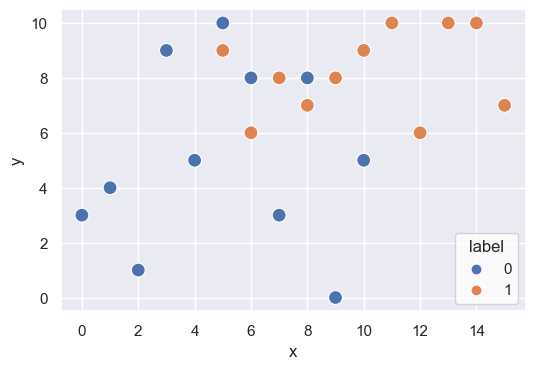

In [168]:
# Generating random values for the testing dataset
np.random.seed(8) # Some good separation seeds: 4,8,15,18,21
xs1 = np.arange(0,11)
ys1 = [np.random.randint(0, len(xs1))  for x in xs1]
xs2 = np.arange(5,16)
ys2 = [np.random.randint(5, len(xs2))  for x in xs2]

# Creating a pandas dataframe for the dataset
df1 = pd.DataFrame(data={'x':xs1, 'y':ys1, 'label':[0 for _ in range(len(xs1))]})
df2 = pd.DataFrame(data={'x':xs2, 'y':ys2, 'label':[1 for _ in range(len(xs1))]})
df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Plotting the dataset
sns.set(style='darkgrid')
plt.figure(figsize=(6,4), dpi=100)
s_plot = sns.scatterplot(data=df, x='x', y='y', hue='label', s=100)
plt.legend(loc='lower right', title='label', facecolor='white')
plt.show()

In [159]:
# Extracting the features and labels from the dataset
ALL_FEATURES = list(zip(df['x'], df['y']))
ALL_LABELS = list(df['label'])

#### Running the perceptron algorithm

In [160]:
# Running the perceptron algorithm and extracting the weights, bias and errors
percep_weights, percep_bias, all_errors = perceptron_algorithm(ALL_FEATURES, ALL_LABELS, epochs=5000, learning_rate=0.01)

#### Plotting the training results

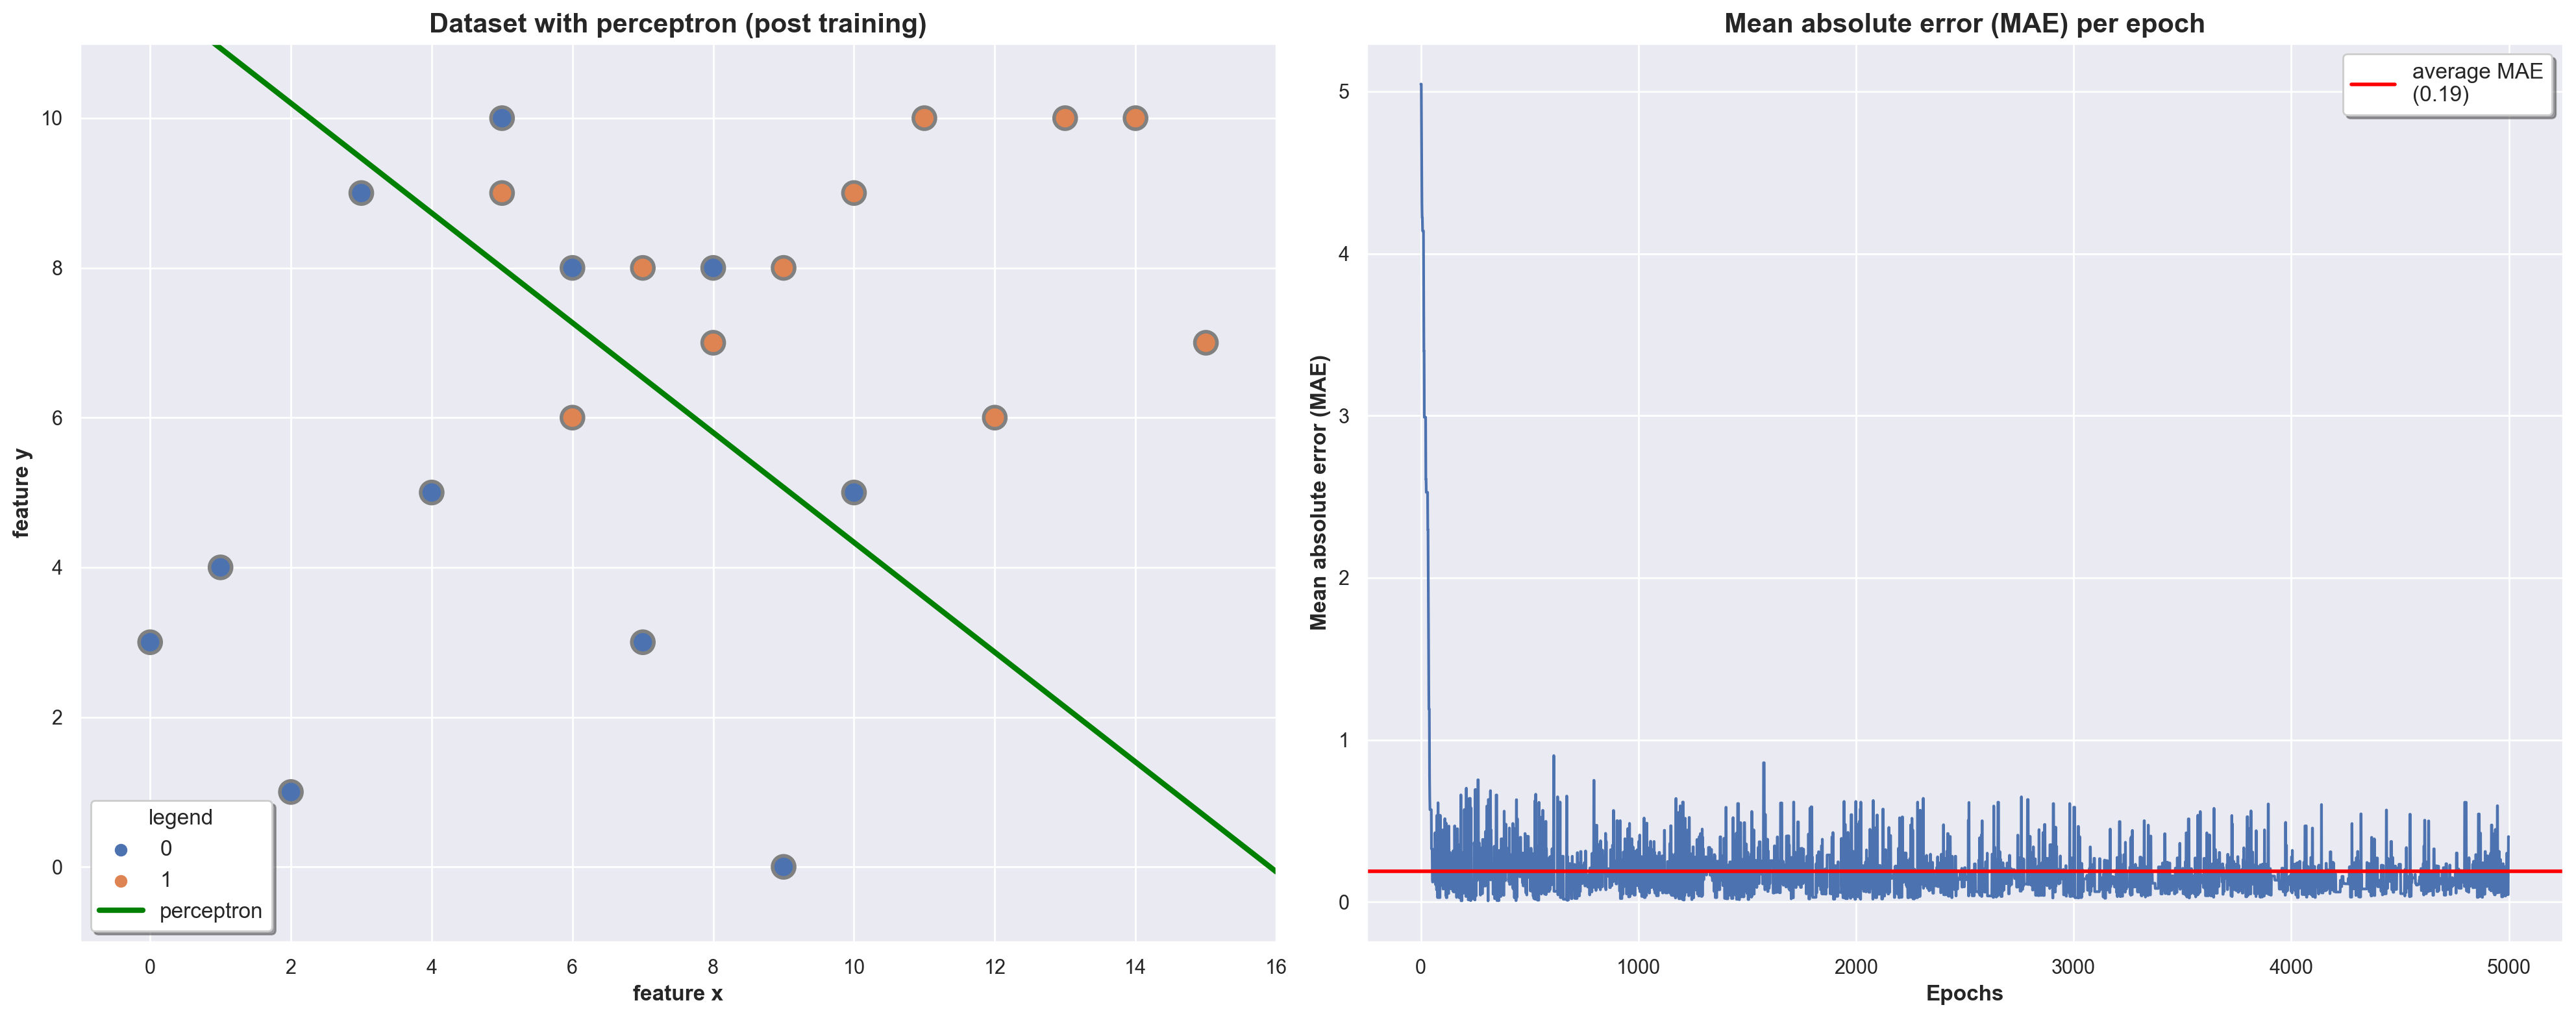

In [161]:
# Plotting the dataset and the perceptron
fig, axs = plt.subplots(1,2, figsize=(20,8), dpi=200)
sns.set(style='darkgrid')
s_plot = sns.scatterplot(data=df, x='x', y='y', hue='label', s=150, ax=axs[0], edgecolor='gray', linewidth=2)
xs,ys = plot_points(weights=percep_weights, bias=percep_bias, x_range=(df['x'].min()-1,df['x'].max()+1))
s_plot.plot(xs, ys, label='perceptron', color='green', lw=3)

s_plot.set_xlim(df['x'].min()-1, df['x'].max()+1)
s_plot.set_ylim(df['y'].min()-1, df['y'].max()+1)
s_plot.set_title("Dataset with perceptron (post training)", fontsize=15, fontweight='bold')
s_plot.set_xlabel("feature x", fontweight='bold')
s_plot.set_ylabel("feature y", fontweight='bold')
s_plot.legend(loc='best', title='legend', facecolor='white', shadow=True, fontsize=12)


# Plotting the errors per epoch
axs[1].plot(all_errors)

axs[1].set_title("Mean absolute error (MAE) per epoch", fontsize=15, fontweight='bold')
axs[1].set_xlabel("Epochs", fontweight='bold')
axs[1].set_ylabel("Mean absolute error (MAE)", fontweight="bold")
axs[1].axhline(y=np.mean(all_errors), color='red', linewidth=2, label=f'average MAE\n({np.round(np.mean(all_errors),2)})')
axs[1].legend(facecolor='white', shadow=True, fontsize=12)

plt.tight_layout()